# Wholesale Customer Data

## Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import time

## Data Overview and Prepeocessing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ET/Presentation/Wholesale customers data.csv')

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.shape

(440, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [ ]:
features = df.drop(['Channel','Region'],axis=1)
features.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


<Axes: >

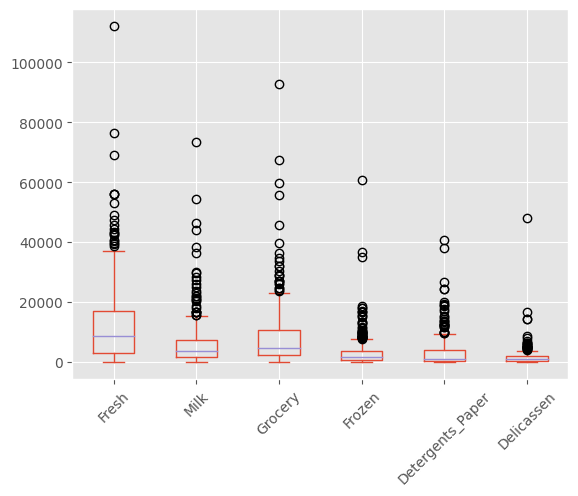

In [ ]:
import matplotlib.pyplot as plt
# set the plotting style to 'ggplot'
plt.style.use('ggplot')

# use pandas to create a box plot
features.plot.box(rot=45)

Text(0, 0.5, 'Milk (m.u.)')

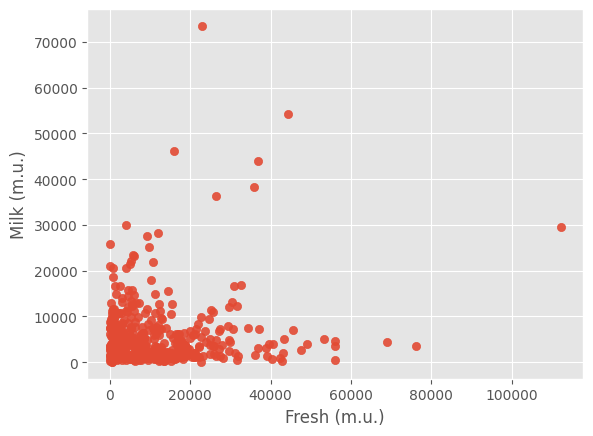

In [ ]:
plt.scatter(features.Fresh, features.Milk, s=35, alpha=0.9)
plt.xlabel('Fresh (m.u.)')
plt.ylabel('Milk (m.u.)')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(features)
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

# Clustering

The dataset is called 'Wholesale customers Data Set' from UCI Machine learning Repository, it contains the annual spending in monetary units (m.u.) on diverse product categories



---



1.   FRESH: annual spending (m.u.) on fresh products (Continuous)
2.   MILK: annual spending (m.u.) on milk products (Continuous)
3.   GROCERY: annual spending (m.u.)on grocery products (Continuous)
4.   FROZEN: annual spending (m.u.)on frozen products (Continuous)
5.   DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6.   DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


Text(0, 0.5, 'Milk (m.u.)')

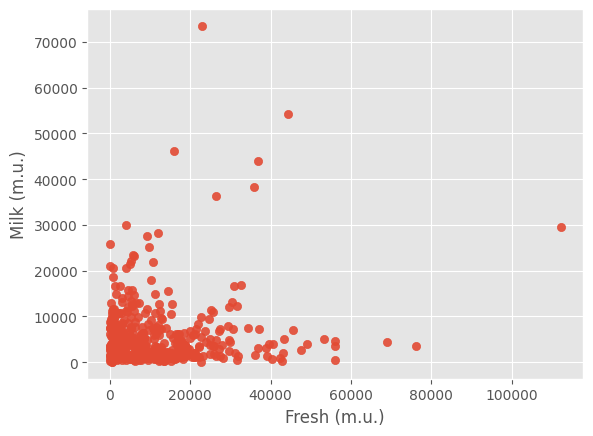

In [ ]:
plt.scatter(features.Fresh, features.Milk, s=35, alpha=0.9)
plt.xlabel('Fresh (m.u.)')
plt.ylabel('Milk (m.u.)')

<Axes: >

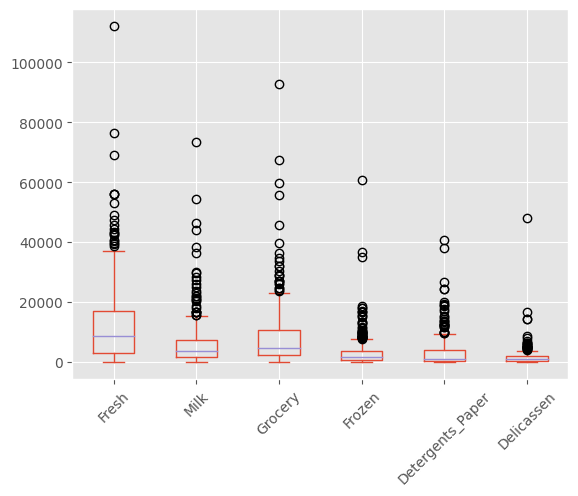

In [ ]:
import matplotlib.pyplot as plt
# set the plotting style to 'ggplot'
plt.style.use('ggplot')

# use pandas to create a box plot
features.plot.box(rot=45)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
d = 6
min_samples = 2*d
eps_range = np.arange(0.1,5,0.1)
min_sample = np.arange(min_samples,24)

# Initialize variables to store best parameters and corresponding silhouette score
best_eps = None
best_minsam = None
best_score = -1

# Perform grid search
for i in eps_range:
    for j in min_sample:
      dbscan = DBSCAN(eps=i, min_samples=j)
      dbscan.fit(X)
      labels = dbscan.labels_
      # Compute silhouette score
      try:
        silhouette_avg = silhouette_score(X, labels)
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_eps = i
            best_minsam = j
      except: pass

print(f"Best Eps: {best_eps}, Best MinSample: {best_minsam}, Best Silhouette Score: {best_score}")


Best Eps: 4.7, Best MinSample: 12, Best Silhouette Score: 0.7997875507977922


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=best_eps, min_samples=best_minsam).fit(X)

In [ ]:
labels = dbscan.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 6


In [ ]:
results = features.copy()
results['Clusters'] = dbscan.labels_

results.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Clusters
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0


In [ ]:
cluster_count_db=results['Clusters'].value_counts()

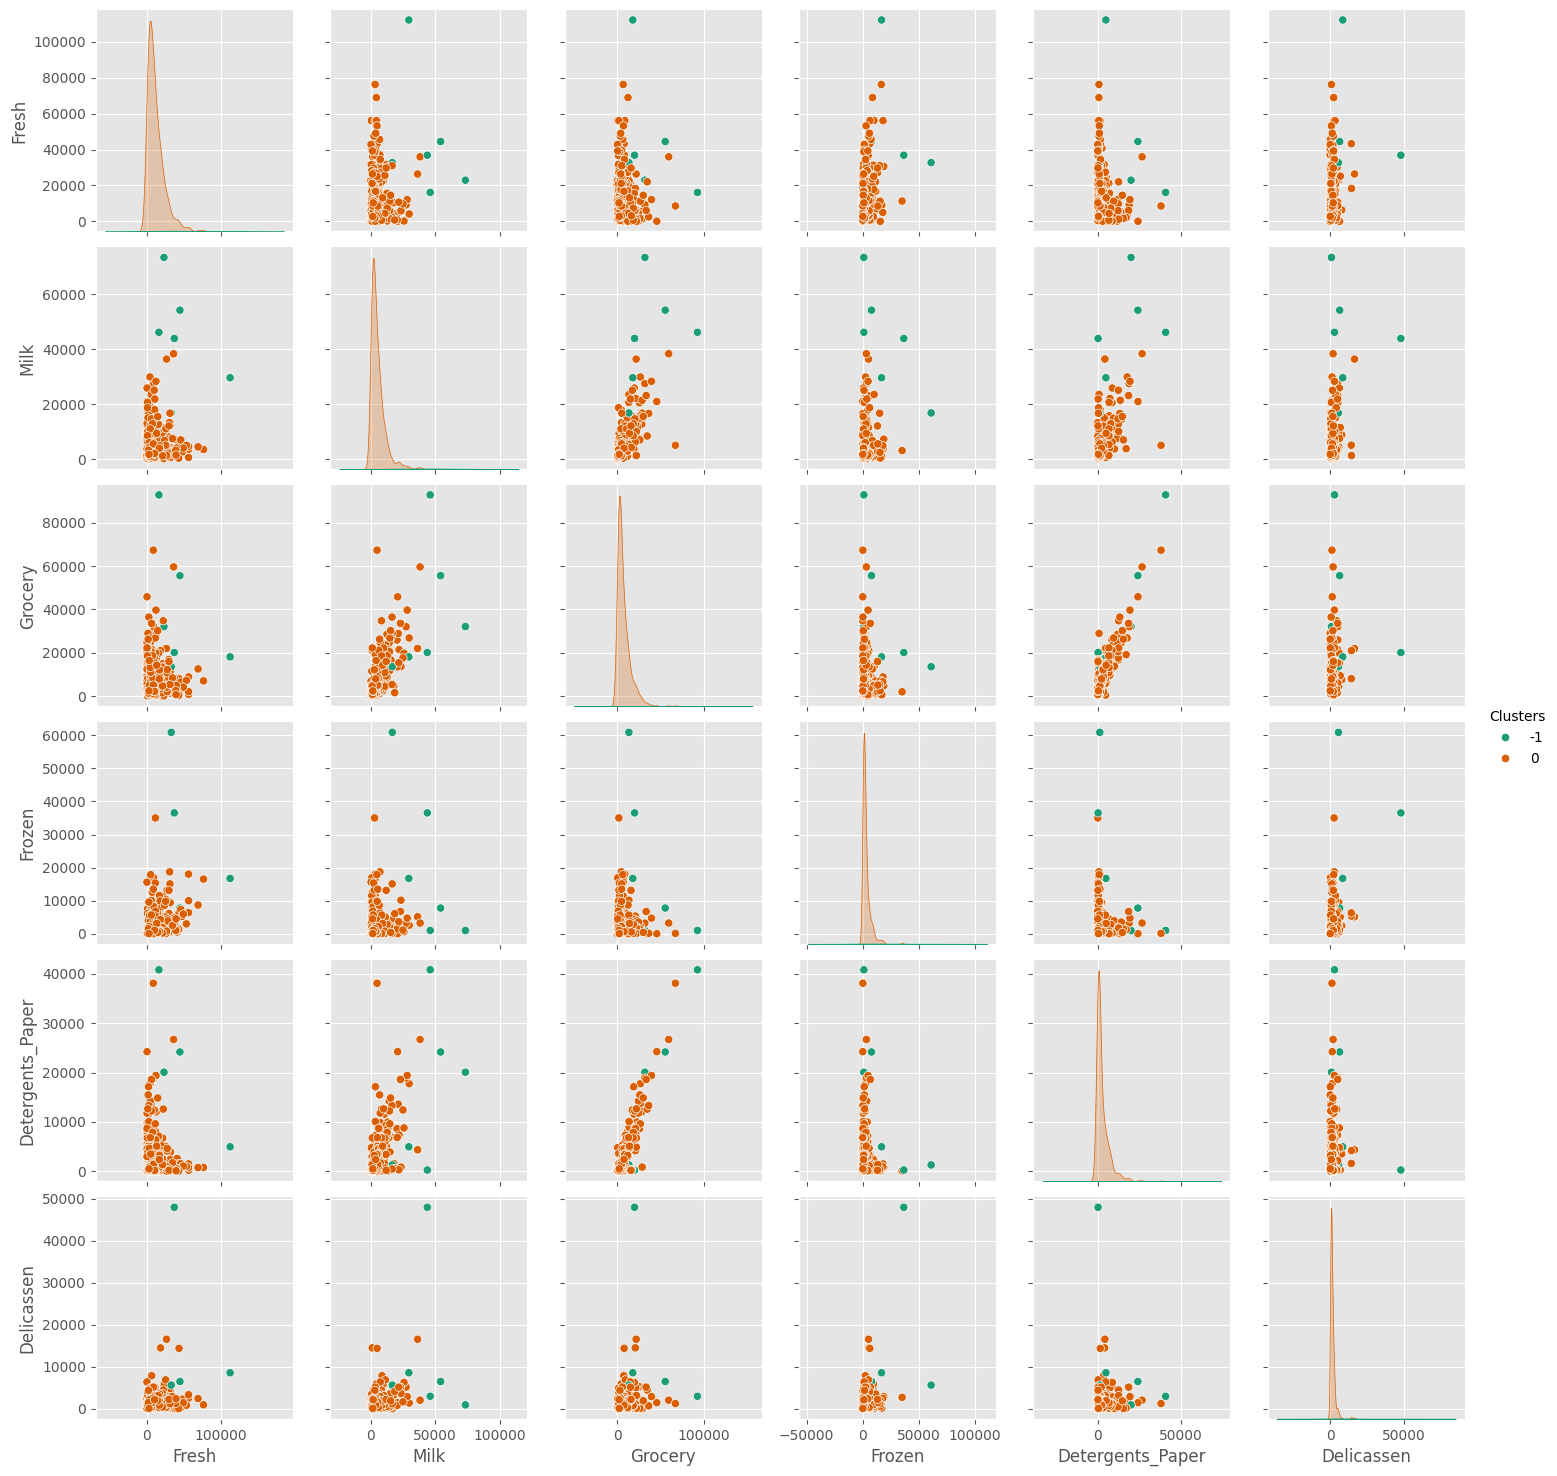

In [ ]:
import seaborn as sns

# Create a scatterplot matrix
sns.pairplot(results, hue='Clusters', palette='Dark2')

In [ ]:
results_mean_db = results.groupby(['Clusters']).mean()
results_mean_db.reset_index(inplace=True)
results_mean_db

,Clusters,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-1,44203.833333,44052.50000,38734.833333,20657.166667,15254.500000,12069.000000
1,0,11555.087558,5267.37788,7525.698157,2828.817972,2710.437788,1379.099078


In [ ]:
from sklearn.cluster import KMeans

n_clusters = np.arange(1,21)
best_n = None
best_score = -1


for i in n_clusters:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  labels = kmeans.labels_
  # Compute silhouette score
  try:
    silhouette_avg = silhouette_score(X, labels)
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_n = i
  except: pass


In [ ]:
print(f" Best n_clusters: {best_n}, Best Silhouette Score: {best_score}")

 Best n_clusters: 2, Best Silhouette Score: 0.5673142510132176


In [ ]:
kmeans = KMeans(n_clusters=best_n)
kmeans.fit(X)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
results = features.copy()
results['Clusters'] = kmeans.labels_

results.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Clusters
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0


In [ ]:
cluster_count_km=results['Clusters'].value_counts()

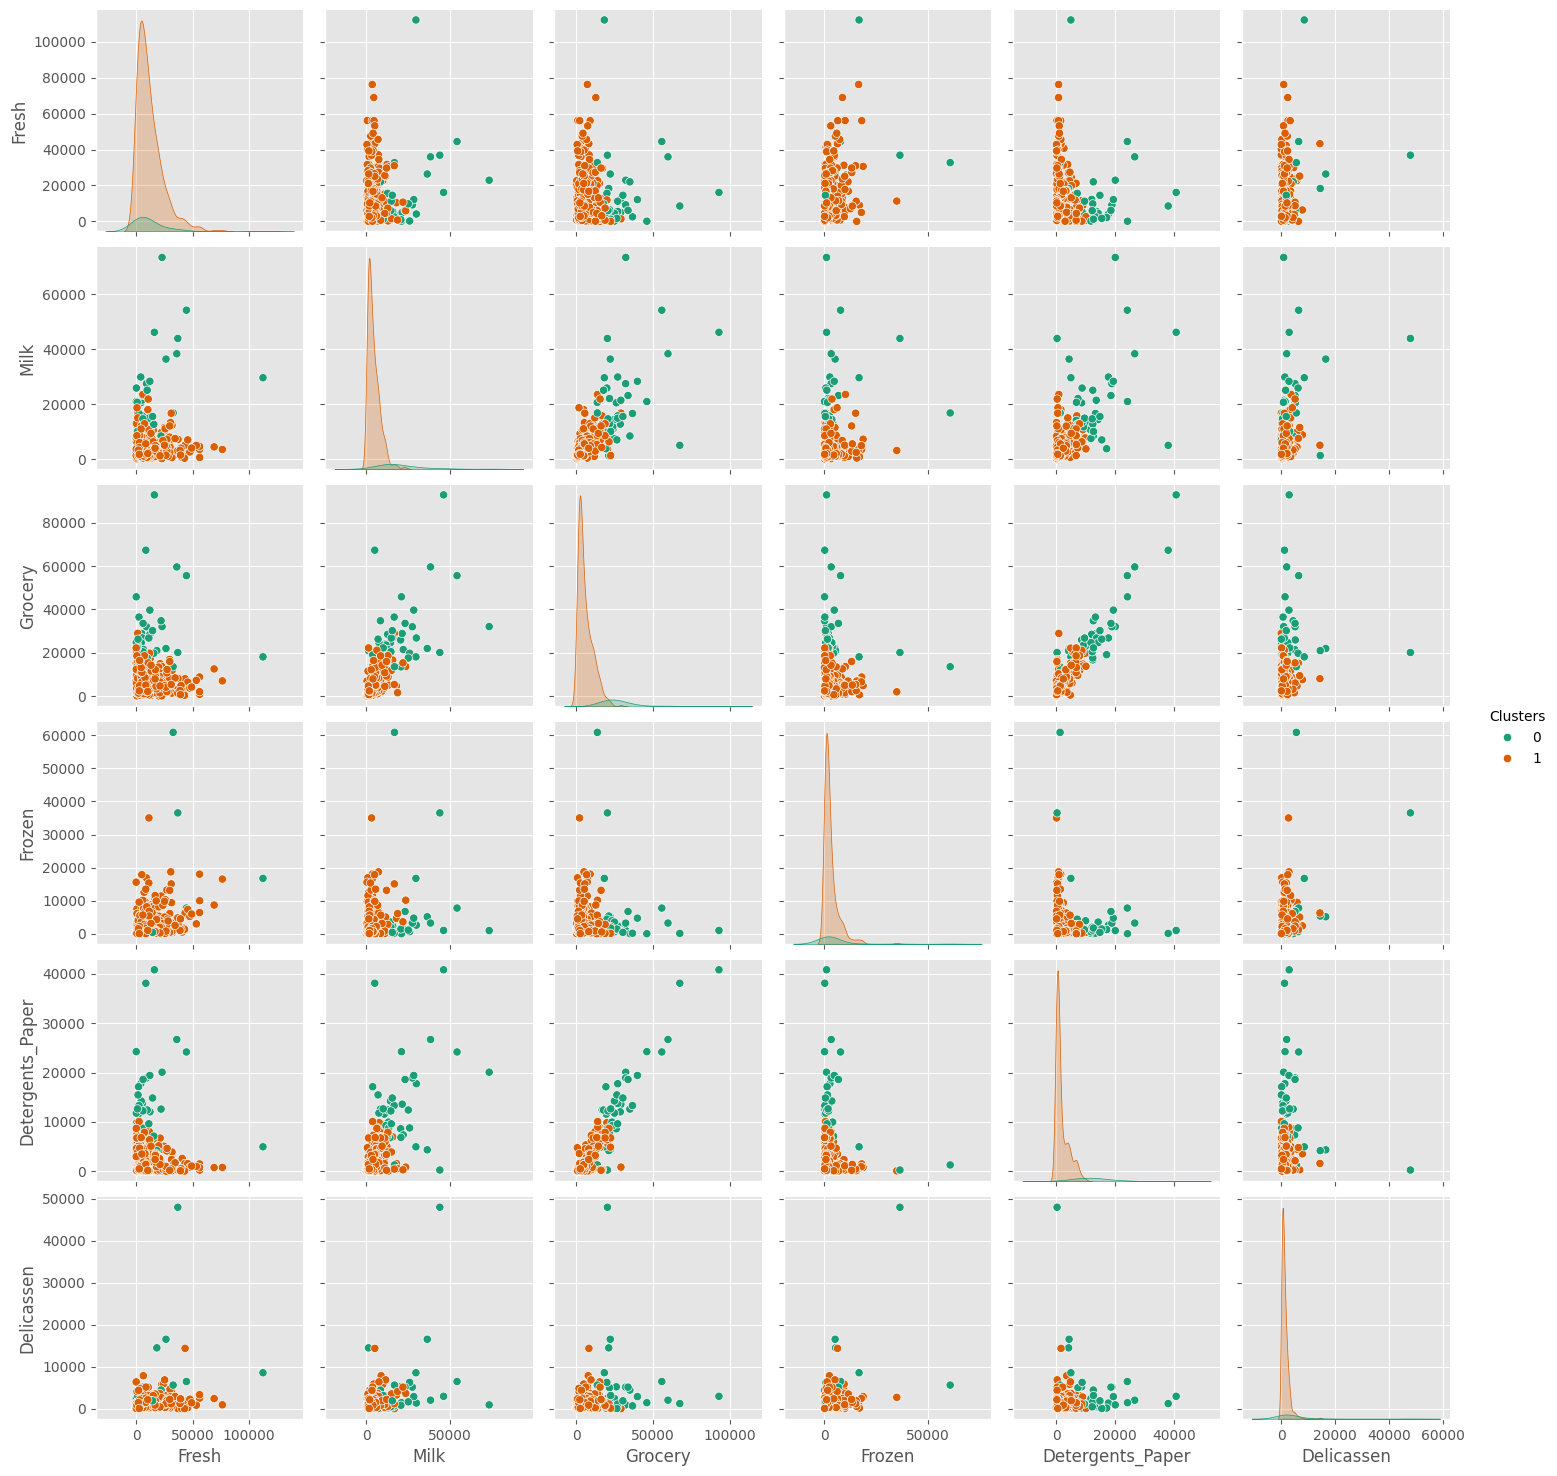

In [ ]:
import seaborn as sns

# Create a scatterplot matrix
sns.pairplot(results, hue='Clusters', palette='Dark2')

In [ ]:
results_mean_km = results.groupby(['Clusters']).mean()
results_mean_km.reset_index(inplace=True)
results_mean_km

,Clusters,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,12802.404762,20572.690476,29049.880952,4653.642857,13424.214286,4046.404762
1,1,11915.653266,4236.944724,5724.791457,2905.017588,1768.944724,1258.778894


## Result of Wholesale customer data
Best Silhouette Score


---


**DBScan**: 0.7997875507977922 ~ 79.98%

**Kmeans**: 0.5673142510132176 ~ 56.73%


---





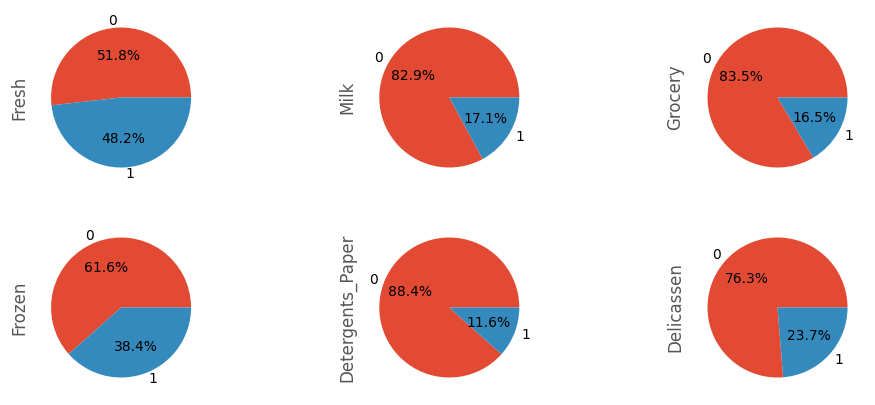

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 5))
results_mean_km['Fresh'].plot(kind='pie',ax=axes[0][0], autopct='%1.1f%%')
results_mean_km['Milk'].plot(kind='pie',ax=axes[0][1], autopct='%1.1f%%')
results_mean_km['Grocery'].plot(kind='pie',ax=axes[0][2], autopct='%1.1f%%')
results_mean_km['Frozen'].plot(kind='pie',ax=axes[1][0], autopct='%1.1f%%')
results_mean_km['Detergents_Paper'].plot(kind='pie',ax=axes[1][1], autopct='%1.1f%%')
results_mean_km['Delicassen'].plot(kind='pie',ax=axes[1][2], autopct='%1.1f%%')
plt.show()

<Axes: ylabel='Clusters'>

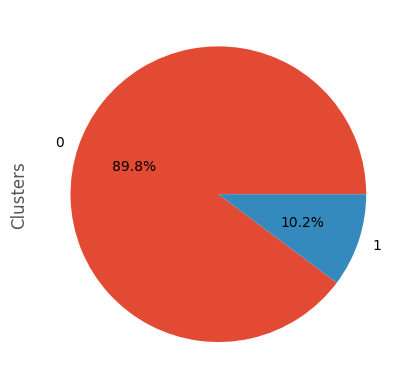

In [ ]:
cluster_count_km.plot(kind='pie', autopct='%1.1f%%')

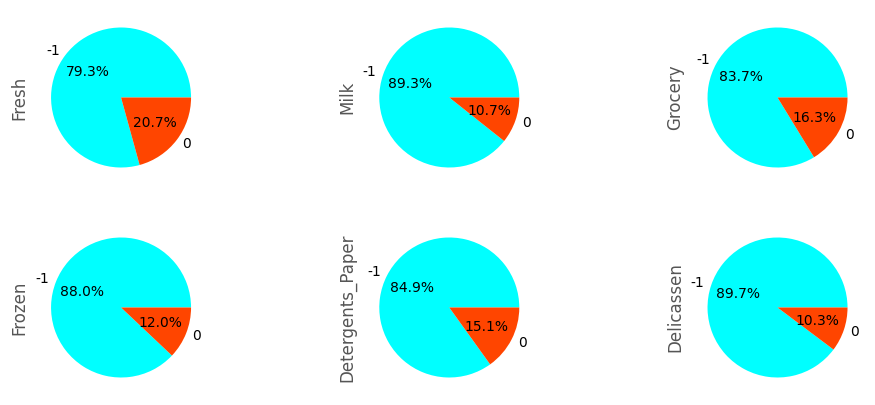

In [ ]:
labels = ['-1', '0']
colors = ['cyan','orangered']

fig, axes = plt.subplots(2, 3, figsize=(12, 5))
results_mean_db['Fresh'].plot(kind='pie', ax=axes[0][0], autopct='%1.1f%%', labels=labels, colors=colors)
results_mean_db['Milk'].plot(kind='pie', ax=axes[0][1], autopct='%1.1f%%', labels=labels, colors=colors)
results_mean_db['Grocery'].plot(kind='pie', ax=axes[0][2], autopct='%1.1f%%', labels=labels, colors=colors)
results_mean_db['Frozen'].plot(kind='pie', ax=axes[1][0], autopct='%1.1f%%', labels=labels, colors=colors)
results_mean_db['Detergents_Paper'].plot(kind='pie', ax=axes[1][1], autopct='%1.1f%%', labels=labels, colors=colors)
results_mean_db['Delicassen'].plot(kind='pie', ax=axes[1][2], autopct='%1.1f%%', labels=labels, colors=colors)

plt.show()


<Axes: ylabel='Clusters'>

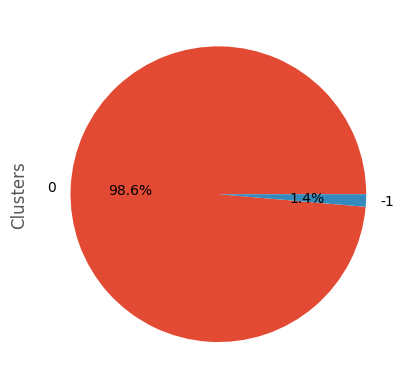

In [ ]:
cluster_count_db.plot(kind='pie', autopct='%1.1f%%')